<b>¡Hola Alejandro!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


## Lectura de datos ##

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(hyp)


                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
Has realizado una carga de datos eficiente y has convertido correctamente las columnas de fecha a un formato datetime. Este paso es fundamental para cualquier análisis temporal que planees realizar, ya que garantiza que las operaciones de tiempo se realicen correctamente.
</div>


## Aplicar el framework ICE para priorizar hipótesis ##

In [2]:
hyp['ICE'] = hyp['Impact'] * hyp['Confidence'] / hyp['Effort']
print(hyp.sort_values(by = 'ICE', ascending = False))


                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

<div class="alert alert-block alert-warning">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Aunque has calculado correctamente el puntaje ICE, sería beneficioso incluir una breve explicación sobre qué representa este puntaje. El puntaje ICE es una métrica que ayuda a priorizar las hipótesis en función de su Impacto, Confianza y Esfuerzo. Esto proporciona un contexto valioso para interpretar los resultados y entender su relevancia en la toma de decisiones.
</div>


## Aplicar el framework RICE para priorizar hipótesis ##

In [3]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Effort']
print(hyp.sort_values(by = 'RICE', ascending = False))


                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE   RICE  
7           8       5  11.200000  112.0  
2           7       3   7.000000   56.0  
0           8       6  13.333333   40.0  
6           8       3   8.000000   40.0  
8           9       5  16.200000   16.2  
3           3       8   1.125000    9

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Excelente trabajo al calcular el puntaje RICE y ordenar las hipótesis en consecuencia. El puntaje RICE, al incluir el factor de Alcance (Reach), ofrece una perspectiva más completa sobre el potencial impacto de cada hipótesis. Esto es crucial para la toma de decisiones estratégicas, ya que permite priorizar aquellas hipótesis que pueden afectar a un mayor número de usuarios.
</div>


   index                                         Hypothesis        ICE   RICE
0      8  Launch a promotion that gives users discounts ...  16.200000   16.2
1      0  Add two new channels for attracting traffic. T...  13.333333   40.0
2      7  Add a subscription form to all the main pages....  11.200000  112.0
3      6  Show banners with current offers and sales on ...   8.000000   40.0
4      2  Add product recommendation blocks to the store...   7.000000   56.0
5      1  Launch your own delivery service. This will sh...   2.000000    4.0
6      5  Add a customer review page. This will increase...   1.333333    4.0
7      3  Change the category structure. This will incre...   1.125000    9.0
8      4  Change the background color on the main page. ...   1.000000    3.0


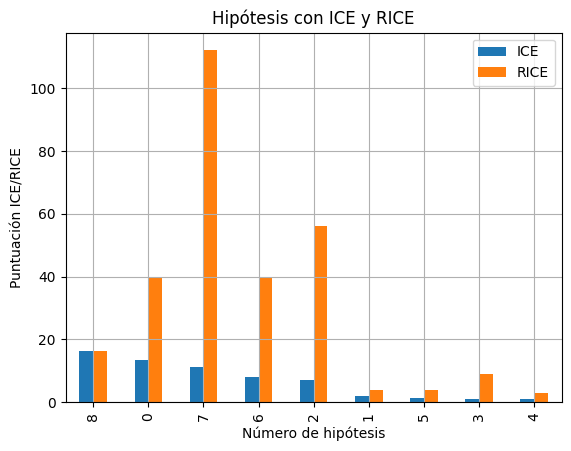

In [39]:
hyp_with_ICE_RICE = hyp[['Hypothesis', 'ICE','RICE']].sort_values(by = ['ICE', 'RICE'], ascending = False).reset_index() 
print(hyp_with_ICE_RICE)

hyp_with_ICE_RICE.plot(x =  'index', y = ['ICE', 'RICE'], kind = 'bar', title = 'Hipótesis con ICE y RICE', xlabel = 'Número de hipótesis',  ylabel = 'Puntuación ICE/RICE', grid = True)
plt.show()


De acuerdo a la tabla de prioridades usando el framework ICE y RICE, la hipótesis número 8 tiene mayor puntaje en ICE que los demás, sin embargo, la hipótesis 7 se lleva por mucho en puntaje a las demás en el puntaje RICE, por lo que se le dará prioridad a esta última hipótesis para llevar a cabo las pruebas A/B. La recomendación general es basarse en el RICE para prorizar, ya que ofrece objetividad y capacidad para considerar más variables.

## Parte 2. Análisis del test A/B ##

### Representa gráficamente el ingreso acumulado por grupo ###

      transactionId   visitorId       date  revenue group
168      2065527789  1581167209 2019-08-01     30.4     A
73       1295850747  2947100995 2019-08-01    455.8     A
72        477940151  1422773200 2019-08-01     15.8     A
71       3679129301     8300375 2019-08-01    165.7     B
70       3574407166  2328378067 2019-08-01    140.4     B
...             ...         ...        ...      ...   ...
1021      969750843  4120364173 2019-08-31    240.5     B
1022     2411823395  3788724847 2019-08-31     45.2     A
1023     2886170101   930758570 2019-08-31    105.7     B
995      3465107905  2075883701 2019-08-31     45.2     B
959      3027277658  2973964255 2019-08-31     30.5     B

[1197 rows x 5 columns]


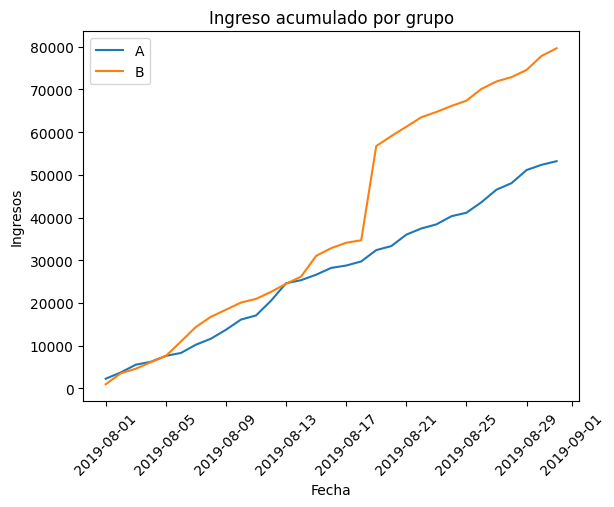

In [5]:
# Agrupo las órdenes por 'visitorId' y 'group', para conocer los usuarios que están en ambos grupos
group_orders = orders.groupby(['visitorId', 'group'], as_index = False).count()

# Almaceno los números de usuario que están duplicados para hacer un filtrado posteriormente
duplicated_users = group_orders[group_orders.duplicated(subset = 'visitorId')]['visitorId']

# Hago un filtrado de los usuarios duplicados y devuelven los valores que no están contenidos en los usuarios duplicados
# para tener solamente usuarios que están en un solo grupo.
filtered_orders = orders[~orders['visitorId'].isin(duplicated_users)]

datesGroups = filtered_orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: filtered_orders[np.logical_and(filtered_orders['date'] <= x['date'], filtered_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title('Ingreso acumulado por grupo')
plt.ylabel('Ingresos')
plt.xlabel('Fecha')

print(orders.sort_values(by = 'date'))

<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Has realizado un buen filtrado de usuarios duplicados para evitar sesgos en el análisis. Documentar este proceso brevemente puede ayudar a clarificar su importancia, ya que garantiza que cada usuario se considere solo una vez, evitando así que los datos se distorsionen y asegurando la validez de tus análisis posteriores.
</div>


Vemos que ambos grupos tienen incrementos de ingresos constantemente, y vemos más ingresos en el grupo B. Esta gráfica no tiene usuarios repetidos en ambos grupos, lo que nos puede decir que los cambios que se implementaron en el grupo B han sido positivos. Sin embargo, es muy abrupto el incremento de ingresos en el grupo B, por lo que habrá que revisar si se hicieron pedidos muy caros o en gran tamaño.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo ###

Text(0.5, 0, 'Fecha')

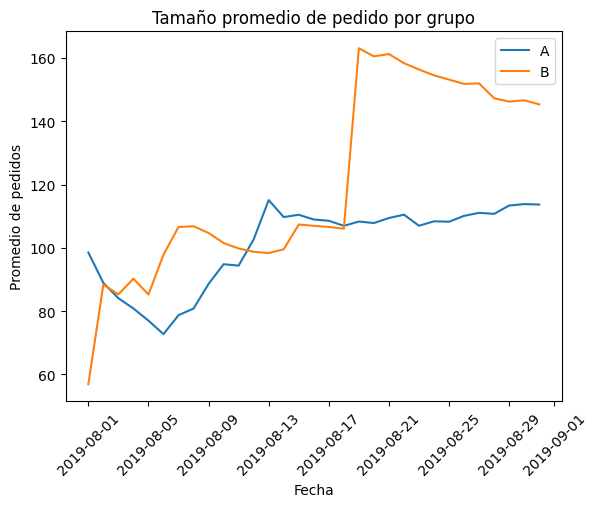

In [6]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.xticks(rotation=45)
plt.title('Tamaño promedio de pedido por grupo')
plt.ylabel('Promedio de pedidos')
plt.xlabel('Fecha')


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
La visualización del tamaño promedio de pedido por grupo es clara y bien estructurada. Esta representación gráfica facilita la comparación entre los grupos A y B, permitiendo identificar rápidamente cualquier diferencia en el comportamiento de compra a lo largo del tiempo.
</div>


Se observa en la gráfica que en las mismas fechas en las que hubo un incremento de ingresos, puede deberse a que hubo un abrupto incremento de pedidos para el grupo B, y vemos tendencia decremental del grupo B después del pedido grande, y el grupo A va estabilizándose. Se sugiere ver los valores atípicos que ocasionaron esos incrementos abruptos de pedidos e ingresos.

Text(0.5, 0, 'Fecha')

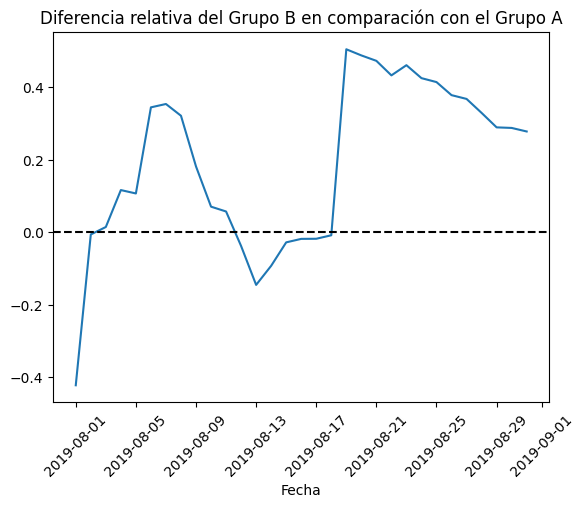

In [7]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Diferencia relativa del Grupo B en comparación con el Grupo A')
plt.xlabel('Fecha')


<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
La gráfica de diferencia relativa entre los grupos es informativa. Considerar la adición de anotaciones o líneas de tendencia podría resaltar períodos o eventos específicos que podrían haber influido en los cambios observados, proporcionando un contexto adicional que podría ser valioso para la interpretación de los resultados.
</div>


En casi todo el periodo de prueba, el Grupo B estuvo encima del Grupo A en los tamaños de pedido promedio acumulado. Así como vimos en la gráfica anterior, tiende a decrecer con el tiempo, lo que nos puede indicar valores atípicos de compra y de pedidos.

         date group  orders  buyers  revenue  visitors  conversion
0  2019-08-01     A      23      19   2266.6       719    0.031989
1  2019-08-01     B      17      17    967.2       713    0.023843
2  2019-08-02     A      42      36   3734.9      1338    0.031390
3  2019-08-02     B      40      39   3535.3      1294    0.030912
4  2019-08-03     A      66      60   5550.1      1845    0.035772
..        ...   ...     ...     ...      ...       ...         ...
57 2019-08-29     B     510     490  74576.7     17708    0.028801
58 2019-08-30     A     460     437  52363.7     18037    0.025503
59 2019-08-30     B     531     511  77863.5     18198    0.029179
60 2019-08-31     A     468     445  53212.0     18736    0.024979
61 2019-08-31     B     548     528  79651.2     18916    0.028970

[62 rows x 7 columns]


Text(0.5, 0, 'Fecha')

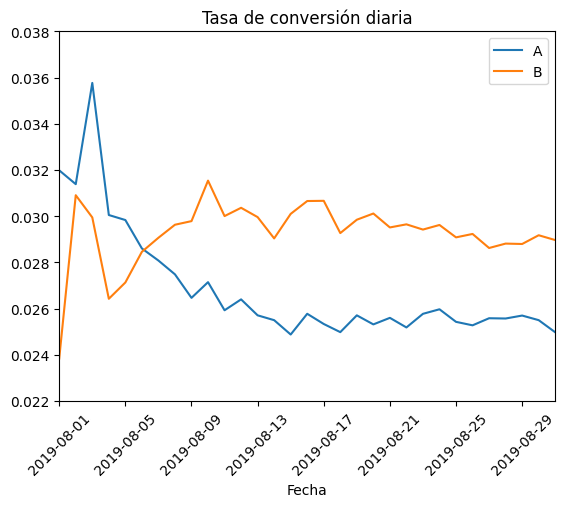

In [8]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

print(cumulativeData)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.022, 0.038])

plt.xticks(rotation=45)
plt.title('Tasa de conversión diaria')
plt.xlabel('Fecha')


<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has calculado y visualizado correctamente la tasa de conversión diaria para cada grupo. Este análisis es fundamental para evaluar el rendimiento relativo de las estrategias implementadas, ya que permite observar cómo varía la efectividad de conversión a lo largo del tiempo entre los diferentes grupos.
</div>


El gráfico nos indica que los primeros días de prueba, el grupo A tuvo mayor taza de conversión entre pedidos por visitantes, sin embargo, al cabo de 6 días, el grupo B fue adquiriendo mejores tazas de conversión y el grupo A fue decreciendo. El grupo B parece estabilizarse alrededor el 3% de conversión y el grupo A en el 2.6%, sin embargo, el grupo A en las últimas fechas se ve que está descendiendo.

### Traza un gráfico de dispersión del número de pedidos por usuario. ###

      visitorId  transactionId
0       5114589              1
1       6958315              1
2      11685486              1
3      39475350              1
4      47206413              1
..          ...            ...
968  4259830713              1
969  4278982564              1
970  4279090005              1
971  4281247801              1
972  4283872382              1

[973 rows x 2 columns]


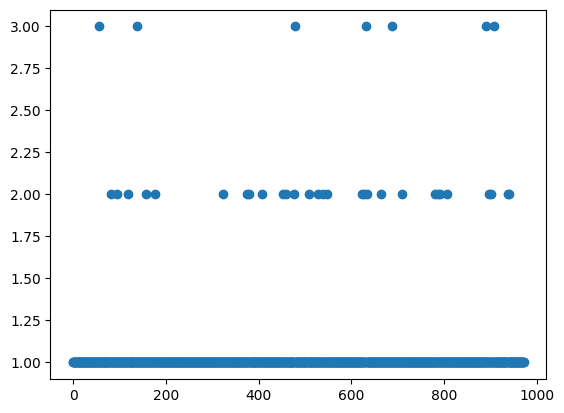

In [9]:
orders_per_user = filtered_orders.groupby('visitorId', as_index = False).agg({'transactionId' : 'count'})

print(orders_per_user)
x_values = pd.Series(range(0, len(orders_per_user['transactionId'])))
plt.scatter(x_values, orders_per_user['transactionId'])

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
El análisis de órdenes por usuario es un buen enfoque para identificar patrones de comportamiento. Considera incluir un análisis adicional, como histogramas o boxplots, para visualizar mejor la distribución de los datos y detectar posibles outliers o tendencias que podrían no ser evidentes en una simple dispersión de puntos.
</div>


La mayoría de los clientes hicieron 1 pedido en el período de prueba, y en menor medida hicieron 2 pedidos. Casos muy raros fueron que los clientes hicieran 3 pedidos, prácticamente 7 clientes fueron los únicos que hicieron 3 pedidos.

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. ###

In [10]:
print(np.percentile(orders_per_user['transactionId'], [95, 99]))


[1. 2.]


<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Has calculado correctamente los percentiles para las órdenes por usuario. Esto es útil para identificar usuarios atípicos que podrían sesgar los resultados, permitiéndote tomar decisiones informadas sobre cómo manejar estos casos en tus análisis.
</div>


El 95% de los usuarios realizaron 1 pedido, por lo que cualquier usuario que haya pedido arriba de 1  paquete se considera una anomalía. 

      transactionId  revenue
0           1062393    100.8
1           4919758     40.2
2           7210578     60.5
3           8131427     75.5
4          11068804     75.7
...             ...      ...
1011     4256972642     35.6
1012     4261512099     50.8
1013     4279408906     15.8
1014     4281129020     60.2
1015     4288552432     10.8

[1016 rows x 2 columns]


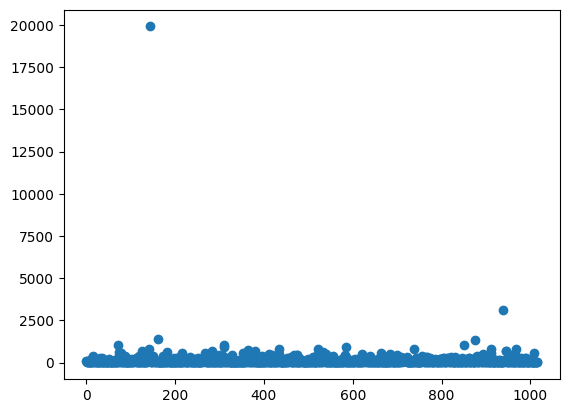

In [11]:
revenue_per_order = filtered_orders.groupby('transactionId', as_index = False).agg({'revenue' : 'sum'})

print(revenue_per_order)
xx_values = pd.Series(range(0, len(revenue_per_order['transactionId'])))
plt.scatter(xx_values, revenue_per_order['revenue'])

#print(filtered_orders)

La mayoría de los pedidos son menores a 2500, y tenemos un solo pedido que está cerca de los 20,000. Esto a primera vista ya se podría consicerar una anomalía, por lo que se recomienda hacer un cálculo de los percentiles para este caso.

### Calcula los percentiles 95 y 99 de los precios de los pedidos. ###

In [12]:
print(np.percentile(revenue_per_order['revenue'], [95, 99]))


[414.275 830.3  ]


<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has identificado correctamente los percentiles del ingreso por pedido, lo cual es crucial para detectar outliers en tus datos. Esta identificación te permite manejar adecuadamente estos valores extremos y asegurar que no distorsionen tus análisis.
</div>


Encontramos que el 95% de los usuarios realizaron compras de menos de 414.275, por lo que los ingresos arriba de ese monto se consideran anomalías.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. ###

In [22]:
ordersByUsersA = filtered_orders[filtered_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = filtered_orders[filtered_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))



0.011
0.160


<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
El uso de la prueba de Mann-Whitney es adecuado para comparar las distribuciones de órdenes entre grupos. Asegúrate de mencionar las suposiciones de esta prueba, como la independencia de las muestras y la ordinalidad de los datos, y explica por qué es apropiada para tus datos. Esto proporcionará un contexto más sólido para tus conclusiones.
</div>


Según los datos sin procesar, sí hay una diferencia entre los grupos A y B en cuanto a la conversión entre los grupos. Obtuvimos un valor p menor a .05, por lo que aceptamos la hipótesis alternativa de que sí hay diferencia entre estos grupos. Vemos también una ganancia relativa del grupo B del 16%, lo que a primera impresión nos indica que sí ha funcionado los cambios implementados por la empresa.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. ###

In [23]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


Encontramos que en cuanto a la diferencia en el tamaño promedio de pedido entre los grupos, no hay una diferencia significativa, ya que obtuvimos un valor p superior a .05, que fue de .692. Sin embargo, encontramos una ganancia positiva del grupo B en relación con el grupo A, lo que puede indicarnos alguna compra muy grande que hizo que el promedio fuera mayor.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. ###

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = filtered_orders[filtered_orders['revenue'] > 600]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.006
0.196


<div class="alert alert-block alert-success">
<b>Celda [34]</b> <a class="tocSkip"></a><br>
Has implementado correctamente un filtrado de usuarios anómalos para evitar que influyan en tus resultados. Esto demuestra una comprensión avanzada de la importancia de limpiar los datos antes del análisis, asegurando que tus conclusiones se basen en datos representativos y precisos.
</div>


Para este apartado, elegimos a los usuario anómalos a aquellos que hicieron más de un pedido y gastaron más de 600 dlls.
Después de remover a los usuarios anómalos, seguimos con una diferencia estadística en la conversión entre los grupos A y B, ya que obtuvimos un valor menor a 0.05 en el valor p, que fue de .006, por lo que rechazamos la hipótesis nula y aceptamos que sí hay diferencia en las conversiones de estos grupos.
A su vez, también observamos que el grupo B sigue teniendo más conversiones en promedio con respecto al grupo A.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. ###

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(filtered_orders[np.logical_and(filtered_orders['group']=='A', np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'], filtered_orders[np.logical_and(filtered_orders['group']=='B', np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.3f}".format(filtered_orders[np.logical_and(filtered_orders['group']=='B', np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / filtered_orders[np.logical_and(filtered_orders['group']=='A', np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))          


0.834
0.061


El valor P de .834 nos indica que no hay una diferencia significativa en cuanto al tamaño promedio de pedidos entre los grupos A y B después de haber removido a los usuarios anómalos, por lo que no podemos rechazar la hipótesis nula. El margen de ganancia del grupo B en comparación con el grupo A se redujo a .061, lo que indica que el remover las anomalías si repercutieron en las ganancias del grupo B, sin embargo, siguen siendo mayores que en el grupo A.

## CONCLUSIÓN ##

Después de observar los resultados y haber obtenido información de las pruebas tanto con usuarios con anomalías y sin éstos, podemos determinar que el grupo B ha tenido mejores resultados en conversiones y en promedio de ingresos después de haber implementado los cambios a partir de la hipótesis número 7 de agregar un formulario en todas las páginas principales para suscribirse. Con esto podemos parar la prueba y considerar al grupo B como líder. 

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Alejandro! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Realizaste una carga y conversión de datos eficiente.<br>
• Calculaste correctamente los puntajes ICE y RICE para priorizar hipótesis.<br>
• Implementaste un filtrado efectivo de usuarios duplicados.<br>
• Visualizaste el tamaño promedio de pedidos de manera clara.<br>
• Calculaste y visualizaste la tasa de conversión diaria correctamente.<br>
• Identificaste correctamente percentiles para detectar outliers.<br>
• Implementaste pruebas estadísticas adecuadas para la comparación de grupos.<br>
• Filtraste usuarios anómalos de manera efectiva.<br>
• Documentaste tus pasos de análisis de manera clara.<br>
• Mostraste una comprensión sólida de los métodos de análisis utilizados.<br>
¡Felicidades!
</div>
